# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import findspark
findspark.init()
import pyspark

In [2]:
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_co2Deforest = pd.read_csv('co2-deforestation-for-food.csv', encoding='latin1')
df_foodProduc = pd.read_csv('Food_Production.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('food-emissions-supply-chain.csv', encoding='latin1')
df_ghg = pd.read_csv('ghg-per-kg-poore.csv', encoding='latin1')
df_foodLoss = pd.read_csv('global-food-loss-index.csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_globalFood2 = pd.read_csv('global-food(1).csv', encoding='latin1')
df_waterWithdrawals = pd.read_csv('water-withdrawals-per-kg-poore.csv', encoding='latin1')
df_continents = pd.read_csv('continents2.csv', encoding='latin1')

In [3]:
df_agroFood.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [4]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

<Axes: >

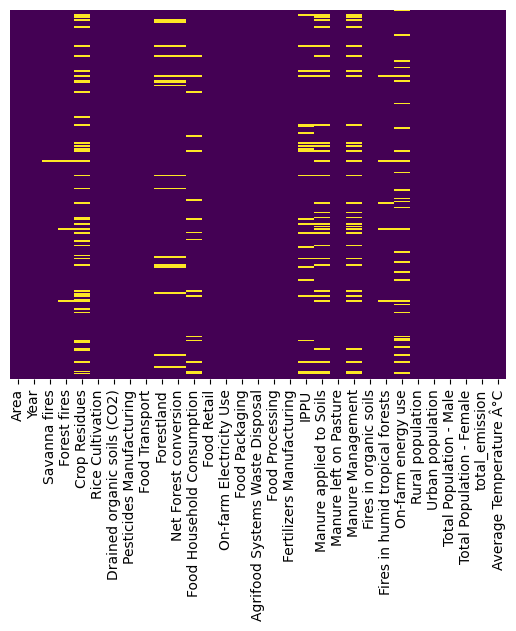

In [5]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,...,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,...,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,...,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,...,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,...,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [7]:
df_co2Deforest.tail()

,Entity,Code,Year,total_embodied_emissions
39,Switzerland,CHE,2013,5.229060e+06
40,Taiwan,TWN,2013,2.539277e+07
41,Turkey,TUR,2013,1.428832e+07
42,United Kingdom,GBR,2013,2.542476e+07
43,United States,USA,2013,1.096465e+08


In [8]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    44 non-null     object 
 1   Code                      44 non-null     object 
 2   Year                      44 non-null     int64  
 3   total_embodied_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [9]:
# make a rename
df_co2Deforest = df_co2Deforest.rename(columns={"Entity": "Country", "total_embodied_emissions": "Total_emission"})
to_drop = ["Code"]
df_co2Deforest = df_co2Deforest.drop(to_drop, axis=1)

In [10]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         44 non-null     object 
 1   Year            44 non-null     int64  
 2   Total_emission  44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
df_foodProduc.tail()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,...,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,...,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,...,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,...,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_foodProduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [13]:
df_foodEmissions.tail()

,Entity,Code,Year,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
38,Sunflower Oil,NaN,2018,0.122421,1.976378,0.0,0.210714,0.184542,0.039322,0.784465,0.281636
39,Tofu,NaN,2018,0.958230,0.494701,0.0,0.793885,0.176925,0.270172,0.177361,0.290470
40,Tomatoes,NaN,2018,0.372987,0.705447,0.0,0.012382,0.177111,0.016692,0.145671,0.658417
41,Wheat & Rye,NaN,2018,0.097130,0.820300,0.0,0.210129,0.125441,0.056049,0.086839,0.177935
42,Wine,NaN,2018,-0.061264,0.626027,0.0,0.138626,0.093284,0.039322,0.749232,0.203536


In [14]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"Entity": "Food", "food_emissions_land_use": "FE_land_use", "food_emissions_farm":"FE_farm","food_emissions_animal_feed":"FE_animal_feed","food_emissions_processing":"FE_processing"})
to_drop = ["Code"]
df_foodEmissions = df_foodEmissions.drop(to_drop, axis=1)

In [15]:
df_foodEmissions.tail()

,Food,Year,FE_land_use,FE_farm,FE_animal_feed,FE_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
38,Sunflower Oil,2018,0.122421,1.976378,0.0,0.210714,0.184542,0.039322,0.784465,0.281636
39,Tofu,2018,0.958230,0.494701,0.0,0.793885,0.176925,0.270172,0.177361,0.290470
40,Tomatoes,2018,0.372987,0.705447,0.0,0.012382,0.177111,0.016692,0.145671,0.658417
41,Wheat & Rye,2018,0.097130,0.820300,0.0,0.210129,0.125441,0.056049,0.086839,0.177935
42,Wine,2018,-0.061264,0.626027,0.0,0.138626,0.093284,0.039322,0.749232,0.203536


In [16]:
df_ghg.tail()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
33,Soy milk,NaN,2010,0.98
34,Tofu,NaN,2010,3.16
35,Tomatoes,NaN,2010,2.09
36,Wheat & Rye,NaN,2010,1.57
37,Wine,NaN,2010,1.79


In [17]:
# make a rename
df_ghg = df_ghg.rename(columns={"Entity": "Food", "GHG emissions per kilogram (Poore & Nemecek, 2018)": "Total_emission_GHG"})
to_drop = ["Code"]
df_ghg = df_ghg.drop(to_drop, axis=1)

In [18]:
df_ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Food                38 non-null     object 
 1   Year                38 non-null     int64  
 2   Total_emission_GHG  38 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
data["Food"].value_counts()

In [19]:
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


In [20]:
# make a rename
df_foodLoss = df_foodLoss.rename(columns={"Entity": "Region", "12.3.1 - Global food loss index - AG_FLS_INDEX": "Global_food_loss_index"})
to_drop = ["Code"]
df_foodLoss = df_foodLoss.drop(to_drop, axis=1)

In [21]:
df_foodLoss.tail()

,Region,Year,Global_food_loss_index
25,Sub-Saharan Africa (UN),2020,103.27
26,Sub-Saharan Africa (UN),2021,98.89
27,World,2016,98.69
28,World,2020,101.20
29,World,2021,98.27


In [17]:
df_foodLoss.rename({'Northen Africa (UN)': 'Northen Africa', 'Northern America (UN)':'Northern America', }, inplace=True)
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


### *Tratar do dataset de global food*

In [18]:
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.634680,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.046130,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.859990,1.4260,NaN,500000.0,...,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.960000,1.4257,NaN,505000.0,...,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.273220,1.4400,NaN,500000.0,...,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,...,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.69900,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,...,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.82710,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,...,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.02010,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,...,NaN,NaN,99000.0,0.006318,6.317940,73.215920,200.591560,637.26965,16.788727,6.857768


In [19]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,301000.0,0.010678,10.677669,1.6448,NaN,183000.0,...,NaN,NaN,45000.0,0.001596,1.596329,1.905032,5.219267,16.099596,0.424491,0.227776
50,NaN,Afghanistan,2011,29249156.0,300120.0,0.010261,10.260809,1.6400,NaN,183000.0,...,NaN,NaN,45000.0,0.001539,1.538506,1.925484,5.275299,16.309984,0.432462,0.226528
51,NaN,Afghanistan,2012,30466484.0,310000.0,0.010175,10.175115,2.1986,NaN,141000.0,...,NaN,NaN,47000.0,0.001543,1.542679,1.830805,5.015904,15.464677,0.409118,0.214787
52,NaN,Afghanistan,2013,31541216.0,312000.0,0.009892,9.891819,2.1972,NaN,142000.0,...,NaN,NaN,47000.0,0.001490,1.490114,1.698356,4.653029,14.364405,0.378549,0.204621
53,NaN,Afghanistan,2014,32716214.0,316000.0,0.009659,9.658819,2.4882,NaN,127000.0,...,0.000214,0.213961,47000.0,0.001437,1.436597,2.713237,7.433527,22.919716,0.601808,0.326404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,...,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.699000,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,...,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.827100,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,...,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.020100,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,...,NaN,NaN,99000.0,0.006318,6.317940,73.215920,200.591560,637.269650,16.788727,6.857768


In [20]:
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,...,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,...,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,...,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,...,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,...,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,...,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,...,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,...,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,...,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [21]:
df_globalFood2 = df_globalFood2[df_globalFood2['Year'] >= 2010]
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,...,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,...,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,...,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,...,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,...,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,...,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,...,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,...,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,...,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [22]:
df_waterWithdrawals.tail()

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
33,Soy milk,NaN,2010,27.8
34,Tofu,NaN,2010,148.6
35,Tomatoes,NaN,2010,369.8
36,Wheat & Rye,NaN,2010,647.5
37,Wine,NaN,2010,78.9


In [23]:
# make a rename
df_waterWithdrawals = df_waterWithdrawals.rename(columns={"Entity": "Food", "Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)": "Freshwater_withdrawals_per_Kg"})
to_drop = ["Code"]
df_waterWithdrawals = df_waterWithdrawals.drop(to_drop, axis=1)

In [23]:
df_continents.rename(columns={'ï»¿name': 'name'}, inplace=True)
df_continents

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [24]:
df_continents = df_continents[['name', 'region', 'sub-region', 'intermediate-region']]
df_continents

,name,region,sub-region,intermediate-region
0,Afghanistan,Asia,Southern Asia,NaN
1,Ã land Islands,Europe,Northern Europe,NaN
2,Albania,Europe,Southern Europe,NaN
3,Algeria,Africa,Northern Africa,NaN
4,American Samoa,Oceania,Polynesia,NaN
...,...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia,NaN
245,Western Sahara,Africa,Northern Africa,NaN
246,Yemen,Asia,Western Asia,NaN
247,Zambia,Africa,Sub-Saharan Africa,Eastern Africa


# Data Preperation

## Years and Countries